In [29]:
import numpy as np
import pandas as pd


from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# NOTE! There are missing imports here, you will have to add to the imports as you go. 
# I suggest you add all your imports at the top of the notebook. (in this cell)

In [3]:
housing= fetch_california_housing(as_frame=True)


In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
type(housing)

sklearn.utils._bunch.Bunch

In [6]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
X=housing.data
y=housing.target

In [8]:
X.shape

(20640, 8)

In [9]:
y.shape

(20640,)

In [10]:
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [13]:
#to look for missing values
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [14]:
X.isnull().sum().sum() #for total null values

0

## Data Analysis


In [15]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


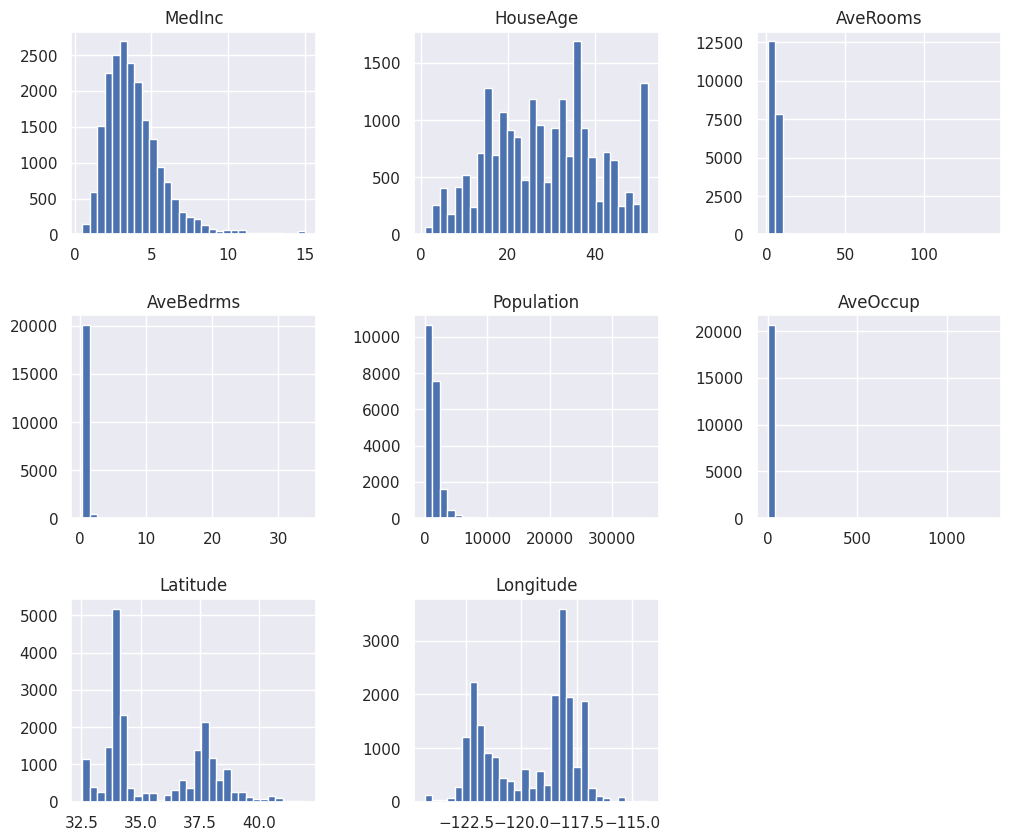

In [16]:
X.hist(figsize=(12,10), bins=30)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

(0.0, 199.0)

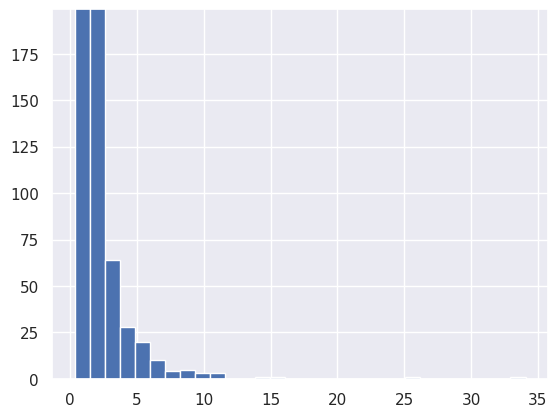

In [17]:
fig,ax= plt.subplots()
X['AveBedrms'].hist(bins=30, ax=ax)
ax.set_ylim(bottom=0, top=199)

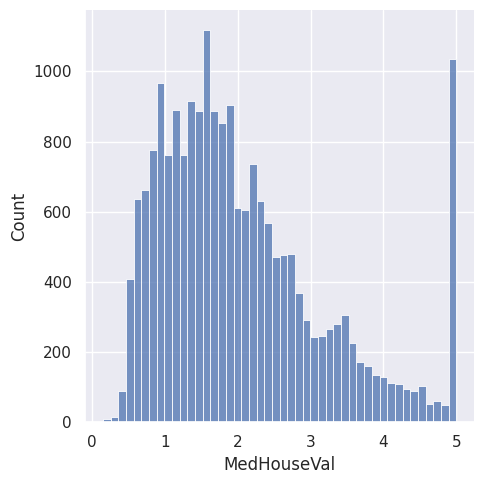

In [18]:
sns.displot(y)

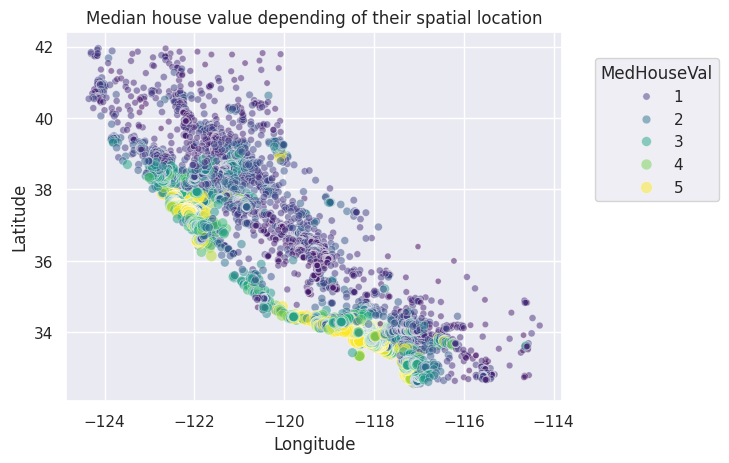

In [19]:
import seaborn as sns

sns.scatterplot(data=X, x="Longitude", y="Latitude",
                size=y, hue=y,
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
plt.title("Median house value depending of their spatial location");

In [20]:
columns_drop = ["Longitude","Latitude"]
subset =  X.drop(columns=columns_drop)
subset["MedHouseVal"]=y
subset["MedHouseVal"]=pd.qcut(subset["MedHouseVal"],6,retbins=False)
subset["MedHouseVal"]=subset["MedHouseVal"].apply(lambda x: x.mid)


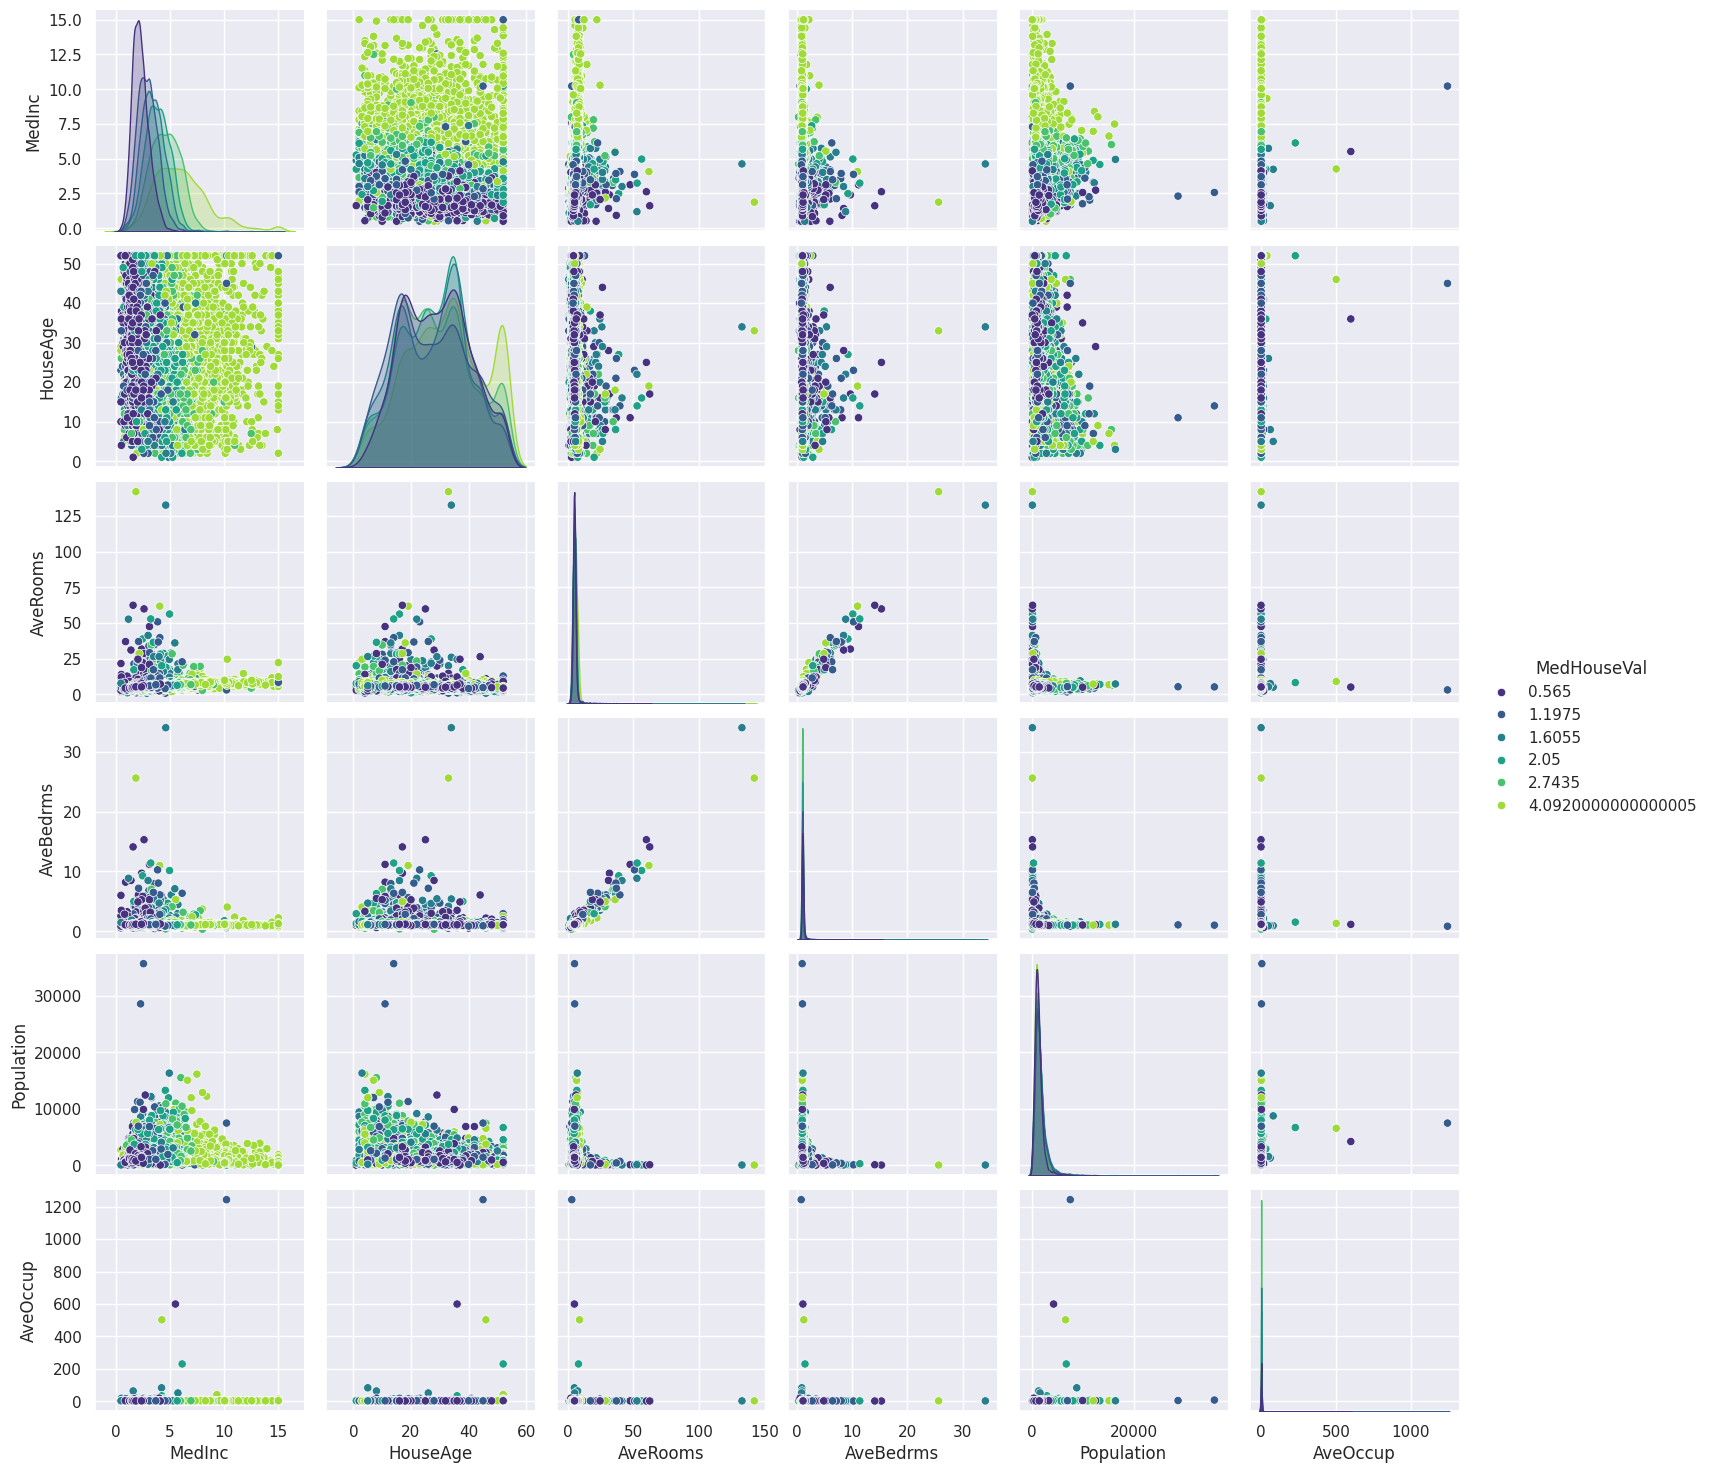

In [21]:
_=sns.pairplot(data=subset,hue="MedHouseVal",palette="viridis")

## Scaling dataset


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Initialize the StandardScaler
scaler = StandardScaler()

scaler.fit(X)
# Fit and transform the data using the scaler
X_transformed = scaler.transform(X)

X_transformed_df=pd.DataFrame(X_transformed, columns=housing.feature_names)
X_transformed_df.head()

# Initialize and fit the Ridge regression model
reg = Ridge(random_state=2023) 
reg.fit(X_transformed, y)


Ridge(random_state=2023)

In [23]:
print(reg.intercept_)

2.0685581690891386


## Train a model

In [24]:
reg=Ridge(random_state=2024)

In [25]:
# Train your model here with .fit
reg.fit(X_transformed,y)

Ridge(random_state=2024)

In [26]:
# you can take a look at the coefficients your model learned with model.coef_ and model.intercept_
print(reg.coef_)
print(reg.intercept_)

[ 0.82959256  0.11881684 -0.26539682  0.30552458 -0.00448006 -0.03932976
 -0.89926646 -0.86991606]
2.0685581690891386


## Evaluating the model

In [27]:
## use your model to make predictions on the data
# you will need to run something like:
y_pred = reg.predict(X_transformed)
# y_pred = model.predict(X) - but you will need to use the model you trained above. 
# also, consider carefully what X data you should be using here 
from sklearn import metrics
print(y_pred)


[4.13155903 3.97643156 3.67659435 ... 0.17177953 0.31958742 0.51628816]


In [32]:
# now you need to evaluate your model.
from sklearn.metrics import r2_score

mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
# you can use the mean squared error and the r2 score to do this.
# you can import these from sklearn.metrics
# remember that you need both predictions and ground truth to evaluate your model.
print(mse)
print(r2)


0.5243210444129817
0.6062326414700455


## Trying more models


In [33]:
# three models to try out - setting them all on defaults (you may need to add imports!)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

reg_ridge = Ridge()
reg_SGD = SGDRegressor()
reg_Linear = LinearRegression()

In [34]:
# put them in a list and loop over them
regs= [reg_ridge, reg_SGD, reg_Linear]

In [35]:
# Write some code that will take your list and then iterate over each model
# for i in regs:
    
# and print out the MSE and R2 score for each model.
# you can use the __class__ attribute to automatically get the name of the model you are using.

for reg in regs:
    reg.fit(X_transformed,y)
    y_pred=reg.predict(X_transformed)
    mse=mean_squared_error(y,y_pred)
    r2=r2_score(y,y_pred)
    class_name={reg.__class__}
    print(f"mse= {mse:.3f} in {class_name}")
    print(f"r2= {r2:.3f} in {class_name}")

mse= 0.524 in {<class 'sklearn.linear_model._ridge.Ridge'>}
r2= 0.606 in {<class 'sklearn.linear_model._ridge.Ridge'>}
mse= 1730.498 in {<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>}
r2= -1298.612 in {<class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>}
mse= 0.524 in {<class 'sklearn.linear_model._base.LinearRegression'>}
r2= 0.606 in {<class 'sklearn.linear_model._base.LinearRegression'>}


## S.D

In [36]:
np.sqrt(0.5243210444129817 ) #your mse value in here


0.7241001618650431